# movie_budget_and_revenue.ipynb

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
from reader import generic_reader
from inflation import read_cpi_by_year, convert_usd

In [2]:
cpi_by_year = read_cpi_by_year("inflation_data/cpiai.csv")

In [3]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_clean.csv")
df_movies['genre_ids'] = df_movies['genre_ids'].apply(ast.literal_eval) # Turn genre_ids into actual Python list
df_movies['director_person_ids'] = df_movies['director_person_ids'].apply(ast.literal_eval) # Turn director_person_ids into actual Python list
df_movies.info()
df_movies.sort_values(by="budget", ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               20489 non-null  int64  
 1   movie_id             20489 non-null  int64  
 2   original_title       20489 non-null  object 
 3   overview             20481 non-null  object 
 4   release_date         20489 non-null  object 
 5   revenue              20489 non-null  int64  
 6   runtime              20489 non-null  int64  
 7   vote_average         20489 non-null  float64
 8   vote_count           20489 non-null  int64  
 9   director_person_ids  20489 non-null  object 
 10  genre_ids            20489 non-null  object 
 11  collection_id        2401 non-null   float64
 12  cast_person_ids      20489 non-null  object 
 13  cast_credit_ids      20489 non-null  object 
 14  crew_person_ids      20489 non-null  object 
 15  crew_credit_ids      20489 non-null 

,budget,movie_id,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,director_person_ids,genre_ids,collection_id,cast_person_ids,cast_credit_ids,crew_person_ids,crew_credit_ids,budget_2023_usd,revenue_2023_usd
19138,583900000,507086,Jurassic World Dominion,"Four years after Isla Nublar was destroyed, di...",2022-06-01,1004004592,147,6.634,6675,[930707],"[12, 28, 878]",328.0,"[73457, 18997, 4784, 4783, 4785, 206425, 16398...","['5b30ddfbc3a36853140012e7', '5b30de25c3a36853...","[1546026, 1084741, 3169987, 2825529, 491, 9307...","['607745d9fbe36f0042882c44', '607745c318864b00...",607935300,1045332818
16807,416000000,181812,Star Wars: The Rise of Skywalker,The surviving Resistance faces the First Order...,2019-12-18,1074144248,142,6.300,10371,[15344],"[12, 28, 878]",10.0,"[4, 2, 1315036, 1023139, 236695, 25072, 6, 153...","['5e867292e375c000143de939', '5e8671e404b59600...","[3084035, 3508489, 3555057, 2825529, 1110521, ...","['60997cee87e63e003b6b9811', '628726963d745400...",495803565,1280203240
7271,379000000,1865,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,2011-05-15,1046721266,136,6.561,14502,[17633],"[12, 28, 14]",295.0,"[85, 955, 118, 6972, 2449, 237455, 469759, 111...","['52fe431cc3a36847f803af13', '52fe431cc3a36847...","[770, 17633, 947, 1705, 1706, 406204, 1526463,...","['52fe431cc3a36847f803aedf', '52fe431cc3a36847...",513391695,1417883919
11124,365000000,99861,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,2015-04-22,1405403694,141,7.271,23747,[12891],"[28, 12, 878]",86311.0,"[3223, 74568, 103, 16828, 1245, 17604, 13548, ...","['55e256d292514162cd000e40', '52fe4a449251416c...","[608, 10850, 7624, 12891, 12891, 113675, 30306...","['60b188428ee49c006dc57b28', '52fe4a449251416c...",469232494,1806742684
15979,356000000,299534,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019-04-24,2799439100,181,8.238,26777,"[19272, 19271]","[12, 878, 28]",86311.0,"[3223, 16828, 103, 74568, 1245, 17604, 16851, ...","['5e85cd735294e700134abf26', '5e85cd84691cd500...","[3019687, 57027, 3064294, 3062791, 4230717, 27...","['6057fbdf8c44b90054683688', '606f5c67dff66e00...",424293436,3336470881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,0,19587,The Education of Charlie Banks,College student Charlie Banks has to face old ...,2007-03-27,0,100,6.100,74,[29783],"[18, 53]",NaN,"[44735, 50095, 56757, 59238, 60898, 96790, 131...","['52fe47e19251416c750a8977', '52fe47e29251416c...","[29783, 182924, 21055, 41674, 59443, 1538314]","['52fe47e29251416c750a8989', '52fe47e29251416c...",0,0
20447,0,763144,The Last Rifleman,A WWII veteran escapes his care home in Northe...,2023-12-07,0,100,6.600,78,[59523],"[18, 36, 10752]",NaN,"[517, 11291, 22384, 920, 43138, 43140, 579295,...","['5fabcf26c8f85800407e17f5', '654869bbd55c3d00...","[3001566, 3782981, 3604383, 3782984, 1203103, ...","['637010bdd7fbda0088763a27', '637010e0798e0600...",0,0
20445,0,973471,The Sacrifice Game,"Christmas break, 1971. Samantha and Clara, two...",2023-12-07,0,99,5.892,74,[1651997],"[27, 53]",NaN,"[3080284, 1515478, 1547061, 582155, 1440577, 2...","['62782b7203bf840050abaa40', '62782b1b9979d234...","[1651997, 1651997, 3541800, 1651997, 2080362, ...","['6278282703bf840066d0c26a', '627828b5a843c100...",0,0
20444,0,1114653,Waitress: The Musical,A waitress and expert pie-maker dreams of a wa...,2023-12-07,0,144,7.400,29,[1017258],"[35, 18]",NaN,"[112024, 4015840, 1397410, 1990959, 43364, 305...","['643df29df706de04db29a2b2', '643df3012efe4e05...","[3066703, 1332292, 1993818, 1213179, 2365927, ...","['6531b7b76d9fe800c4a863f5', '6531b7deb2681f01...",0,0


In [4]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'budget', 'budget_2023_usd', 'revenue', 'revenue_2023_usd', 'vote_average', 'vote_count', 'director_person_ids', 'genre_ids']
df_movies = df_movies[columns_to_keep].copy()
df_movies

,movie_id,original_title,release_date,budget,budget_2023_usd,revenue,revenue_2023_usd,vote_average,vote_count,director_person_ids,genre_ids
0,300236,Carnage: The Legend of Quiltface,2000-01-01,0,0,0,0,2.500,10,[103123],[27]
1,96716,The Bumblebee Flies Anyway,2000-01-01,0,0,0,0,6.200,30,[126537],"[18, 10749]"
2,71618,After Sex,2000-01-01,0,0,0,0,5.000,27,[176312],"[35, 18, 10749]"
3,56721,The Mummy Theme Park,2000-01-01,0,0,0,0,4.000,14,[1595512],[27]
4,48235,The Complete Works of William Shakespeare (Abr...,2000-01-01,0,0,0,0,7.100,10,[930753],[35]
...,...,...,...,...,...,...,...,...,...,...,...
20484,994108,All of Us Strangers,2023-12-22,5000000,5000000,14864960,14864960,7.443,898,[586002],"[10749, 18, 14]"
20485,979097,Memory,2023-12-22,0,0,313000,313000,7.093,176,[1082434],[18]
20486,1180358,A Royal Christmas Holiday,2023-12-23,0,0,0,0,5.800,11,[31155],"[10770, 35, 10749]"
20487,823452,The Boys in the Boat,2023-12-25,40000000,40000000,54401583,54401583,7.233,311,[1461],"[18, 36]"


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20489 entries, 0 to 20488
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             20489 non-null  int64  
 1   original_title       20489 non-null  object 
 2   release_date         20489 non-null  object 
 3   budget               20489 non-null  int64  
 4   budget_2023_usd      20489 non-null  int64  
 5   revenue              20489 non-null  int64  
 6   revenue_2023_usd     20489 non-null  int64  
 7   vote_average         20489 non-null  float64
 8   vote_count           20489 non-null  int64  
 9   director_person_ids  20489 non-null  object 
 10  genre_ids            20489 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 1.7+ MB


In [6]:
# Drop movies where budget is zero
df_movies = df_movies[df_movies['budget'] != 0].copy()
# df_movies = df_movies[(df_movies['budget'] != 0) & (df_movies['revenue'] != 0)].copy()
len(df_movies)

6200

In [7]:
# Convert release_date into proper datetime objects
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Create year column
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies.sort_values(by="release_year", ascending=False)

,movie_id,original_title,release_date,budget,budget_2023_usd,revenue,revenue_2023_usd,vote_average,vote_count,director_person_ids,genre_ids,release_year
20388,1071215,Thanksgiving,2023-11-16,15000000,15000000,46553280,46553280,6.500,1419,[16847],"[27, 9648]",2023
20376,1056360,American Fiction,2023-11-10,16000000,16000000,22483370,22483370,7.306,1179,[1893777],"[35, 18]",2023
20371,936059,The Naughty Nine,2023-11-09,32000000,32000000,0,0,6.229,72,[1544795],"[10751, 12, 35, 10770, 80]",2023
20392,930564,Saltburn,2023-11-16,20000000,20000000,21013738,21013738,6.975,2645,[1252934],"[18, 35, 53]",2023
20229,820525,After Everything,2023-09-13,14000000,14000000,10644463,10644463,6.879,943,[1448492],"[10749, 18]",2023
...,...,...,...,...,...,...,...,...,...,...,...,...
216,55101,The Guilty,2000-06-01,700000,1238624,0,0,5.661,87,[58384],"[80, 18, 53]",2000
65,14181,Boiler Room,2000-02-18,7000000,12386243,28780255,50925606,6.708,701,[24294],"[80, 18, 53]",2000
66,2787,Pitch Black,2000-02-18,23000000,40697656,53187659,94113612,6.851,4600,[28239],"[53, 878, 28]",2000
67,2069,The Whole Nine Yards,2000-02-18,41300000,73078835,106371651,188220735,6.464,1973,[21217],"[35, 80]",2000


In [8]:
df_movies
df_movies.sort_values(by="budget_2023_usd", ascending=False)

,movie_id,original_title,release_date,budget,budget_2023_usd,revenue,revenue_2023_usd,vote_average,vote_count,director_person_ids,genre_ids,release_year
19138,507086,Jurassic World Dominion,2022-06-01,583900000,607935300,1004004592,1045332818,6.634,6675,[930707],"[12, 28, 878]",2022
7271,1865,Pirates of the Caribbean: On Stranger Tides,2011-05-15,379000000,513391695,1046721266,1417883919,6.561,14502,[17633],"[12, 28, 14]",2011
16807,181812,Star Wars: The Rise of Skywalker,2019-12-18,416000000,495803565,1074144248,1280203240,6.300,10371,[15344],"[12, 28, 878]",2019
11124,99861,Avengers: Age of Ultron,2015-04-22,365000000,469232494,1405403694,1806742684,7.271,23747,[12891],"[28, 12, 878]",2015
4168,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,440867221,961691209,1413260435,7.262,14944,[1704],"[12, 14, 28]",2007
...,...,...,...,...,...,...,...,...,...,...,...,...
8094,221161,Devoured,2012-05-05,1,1,0,0,5.511,46,[147900],"[53, 27, 18]",2012
5081,20034,Hush,2008-08-13,1,1,0,0,5.600,155,[86482],"[53, 27, 28]",2008
15735,571055,Down,2019-02-01,1,1,0,0,6.800,246,[120245],"[27, 53, 10770]",2019
5870,49970,Junkyard Dog,2009-08-09,1,1,0,0,4.100,11,[134878],"[27, 53]",2009


Calculate profit and ROI

In [9]:
df_movies['profit_2023_usd'] = df_movies['revenue_2023_usd'] - df_movies['budget_2023_usd']
df_movies['roi'] = ( df_movies['profit_2023_usd'] / df_movies['budget_2023_usd'] )*100
df_movies.sort_values(by="profit_2023_usd", ascending=False)

,movie_id,original_title,release_date,budget,budget_2023_usd,revenue,revenue_2023_usd,vote_average,vote_count,director_person_ids,genre_ids,release_year,profit_2023_usd,roi
6206,19995,Avatar,2009-12-15,237000000,336605225,2923706026,4152467198,7.600,32656,[2710],"[28, 12, 14, 878]",2009,3815861973,1133.631236
15979,299534,Avengers: Endgame,2019-04-24,356000000,424293436,2799439100,3336470881,8.238,26777,"[19272, 19271]","[12, 878, 28]",2019,2912177445,686.359297
11913,140607,Star Wars: The Force Awakens,2015-12-15,245000000,314964276,2068223624,2658843091,7.300,19987,[15344],"[12, 28, 878]",2015,2343878815,744.172909
14717,299536,Avengers: Infinity War,2018-04-25,300000000,364030217,2052415039,2490470306,8.236,30989,"[19271, 19272]","[12, 28, 878]",2018,2126440089,584.138346
19689,76600,Avatar: The Way of Water,2022-12-14,350000000,364407184,2320250281,2415759634,7.610,12904,[2710],"[878, 12, 28]",2022,2051352450,562.928652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18610,512195,Red Notice,2021-11-04,160000000,179917697,178143,200319,6.756,6116,[57633],"[28, 35, 80]",2021,-179717378,-99.888661
16614,398978,The Irishman,2019-11-01,159000000,189501843,968853,1154713,7.583,7178,[1032],"[80, 18, 36]",2019,-188347130,-99.390659
19229,725201,The Gray Man,2022-07-13,200000000,208232677,454023,472712,6.931,3935,"[19272, 19271]","[28, 53]",2022,-207759965,-99.772989
18433,588228,The Tomorrow War,2021-09-03,200000000,224897121,14400000,16192593,7.491,3826,[144816],"[28, 878, 12]",2021,-208704528,-92.800000


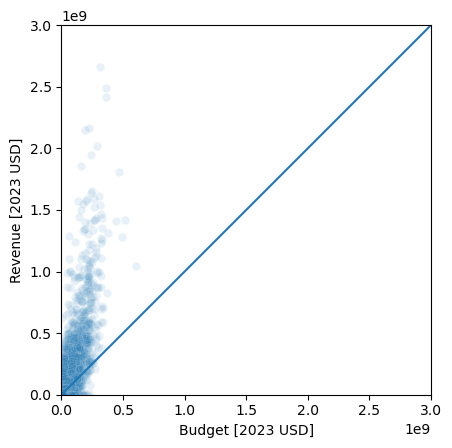

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['revenue_2023_usd'], alpha=0.1)
plt.xlim(0, 3e9)
plt.ylim(0, 3e9)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 3e9], [0, 3e9])
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Revenue [2023 USD]");

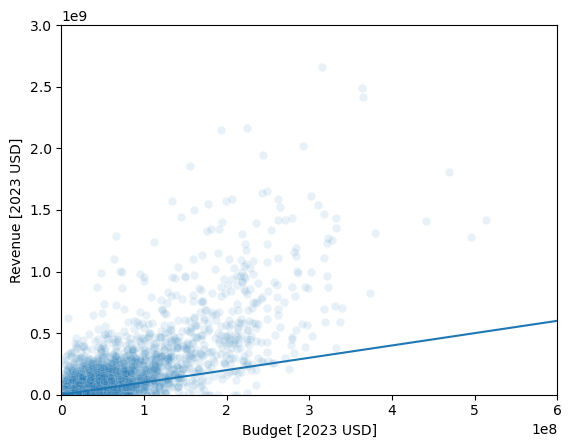

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['revenue_2023_usd'], alpha=0.1)
plt.xlim(0, 0.6e9)
plt.ylim(0, 3e9)
# plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 3e9], [0, 3e9])
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Revenue [2023 USD]");

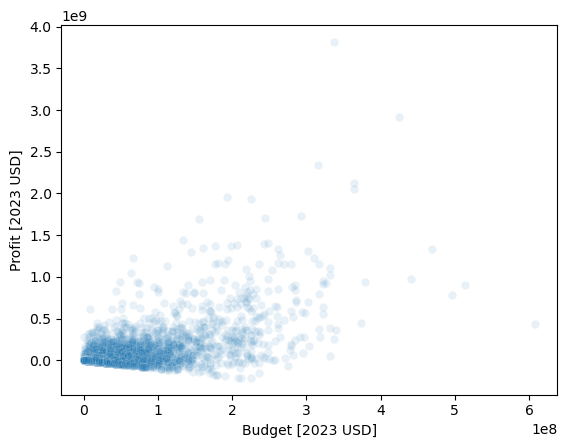

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['profit_2023_usd'], alpha=0.1)
# plt.xlim(0, 0.6e9)
# plt.ylim(0, 3e9)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.plot([0, 3e9], [0, 3e9])
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Profit [2023 USD]");

<Axes: xlabel='budget_2023_usd', ylabel='vote_average'>

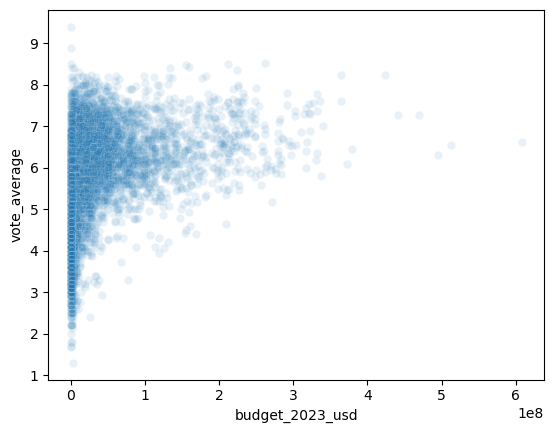

In [13]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['vote_average'], alpha=0.1)

<Axes: xlabel='profit_2023_usd', ylabel='vote_average'>

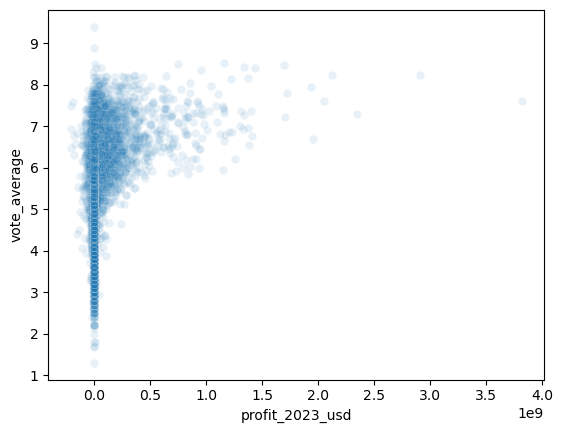

In [14]:
sns.scatterplot(x=df_movies['profit_2023_usd'], y=df_movies['vote_average'], alpha=0.1)

(-100.0, 2000.0)

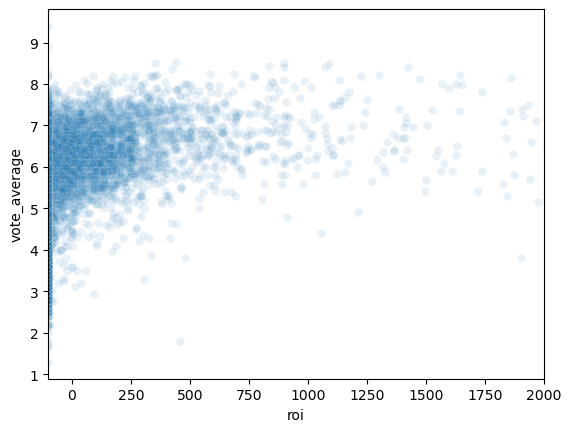

In [15]:
sns.scatterplot(x=df_movies['roi'], y=df_movies['vote_average'], alpha=0.1)
plt.xlim(-100, 2000)